# Basic Visualization
In this tutorial we show how Python and its graphics libraries can be used to create the two most common types of distributional plots: histograms and boxplots.

## Preliminaries
I include the data import and library import commands at the start of each lesson so that the lessons are self-contained.


In [1]:
import pandas as pd
bank = pd.read_csv('Data/Bank.csv')


## Basic descriptive statistics
Pandas provides basic descriptive statistic functions as methods of the Series object.  Recall that each DataFrame object consists of multiple Series (columns).  Thus, the average salary for bank employees can be found as: 

In [2]:
bank['Salary'].mean()

39.921923076923086

Similarly, using a variable to save some typing:

In [3]:
sal = bank['Salary']
sal.min(), sal.mean(), sal.median(), sal.max() 

(26.7, 39.921923076923086, 37.0, 97.0)

Or, recall, we can get statistical summary of all numerical columns using the `describe()` method:

In [4]:
bank.describe()

,Employee,EducLev,JobGrade,YrHired,YrBorn,YrsPrior,Salary
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,104.500000,3.158654,2.759615,85.326923,54.605769,2.375000,39.921923
std,60.188592,1.467464,1.566529,6.987832,10.318988,3.135237,11.256154
min,1.000000,1.000000,1.000000,56.000000,30.000000,0.000000,26.700000
25%,52.750000,2.000000,1.000000,82.000000,47.750000,0.000000,33.000000
50%,104.500000,3.000000,3.000000,87.000000,56.500000,1.000000,37.000000
75%,156.250000,5.000000,4.000000,90.000000,63.000000,4.000000,44.000000
max,208.000000,5.000000,6.000000,93.000000,73.000000,18.000000,97.000000


## Histograms in Seaborn
Two graphics libraries are in common use in Python: Matplotlib and Seaborn.  Seaborn is an extension of Matplotlib that addresses a few specific graphics challenges, including histograms and boxplots.  As such, we will restrict our attention here to Seaborn.

## Loading the library
As before, we must load a library before we can use it.  Seaborn is typically aliased as `sns`, but this is just a convention.

In [5]:
import seaborn as sns

## Creating a histogram
Histograms are created in Seaborn using the `distplot()` (distribution plot) method.  The syntax of Seaborn is closer to R than Python.  For example, the plot is called on a Seaborn library object (`sns`) and passed a data frame as an argument.

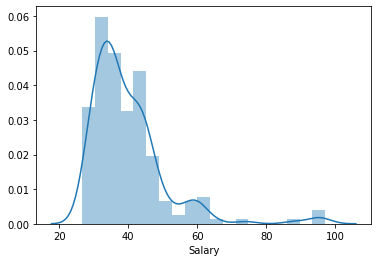

In [6]:
sns.distplot(bank['Salary'])

A few things to notice about this output
+ The `distplot()` method returns an AxesSubplot value.  Since we don't need this (or even know what it is), we can clean-up our output in ending each Seaborn (or Matplotlib) call with a semicolon.
+ Seaborn guesses at a good number of bins.  It appears to be more than the default in R.  But recall that the point of a histogram is to get a rough sense of the shape of the distribution of the variable.  We can certainly change the number of bins (to say 10 or 12), but it is not critical.
+ As in SAS, Seaborn provides a kernel density plot by default. The kernel density plot is just  smoothed version of the blocky histogram&mdash;it provides the same information.
+ The Y-axis defaults to density rather than frequency.

We can pass some arguments to the method to get a more basic histogram. Turning off the kernel density estimate (`kde=False`) switches the Y-axis back to frequency:

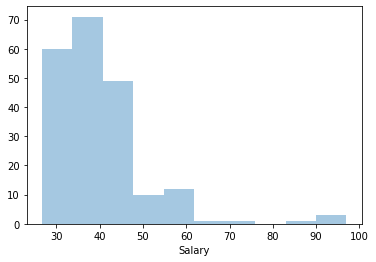

In [7]:
sns.distplot(bank['Salary'], bins=10, kde=False);

Of course, it is possible to change colors, and so on.  I have split the more detailed method call below over multiple lines, which is more readable and more with keeping with R-style coding.

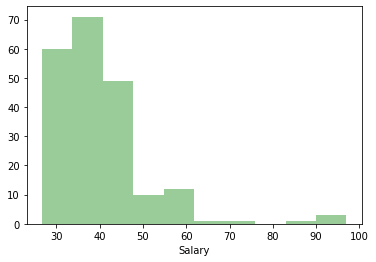

In [12]:
sns.distplot(bank['Salary'], 
             bins=10, kde=False, 
             norm_hist=False, 
             color='green' 
            );

Finally, it is a simple matter to fit a reference normal curve to the distribution.  For this to work, a few things have to happen:
+ The Y-axis has to be density rather than frequency: `norm_hist=True`
+ Python needs to know what a Normal distribution is.  This definition is found in a different library: Scipy. The scipy library has a value `stats.norm` that can be used in the fit parameter.
+ The bars can be suppressed to enable an easier comparison between the kernel density plot (which follows the actual data) and the fitted normal curve, which is a theoretical reference.

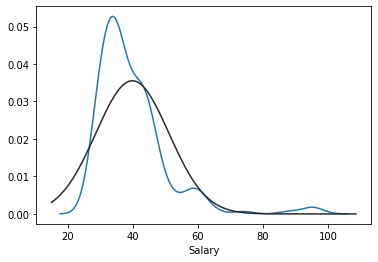

In [9]:
from scipy import stats
sns.distplot(bank['Salary'], hist=False, kde=True, norm_hist=True, fit=stats.norm);

## Creating a boplot
Creating a boxplot in Seaborn is very simple:

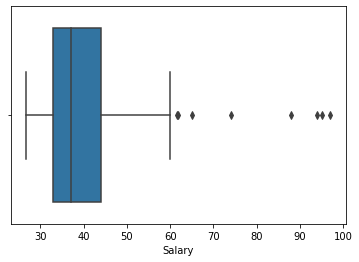

In [10]:
sns.boxplot(bank['Salary']);

If you prefer a vertical orientation, you can set the `orient` parameter to 'v' or 'h'.  Also, notice that Seaborn does not provide an indicator of the mean by default.  Obviously, skewed data such as this pulls the mean to the right of the median.  I like to eyeball the difference between the two measures.

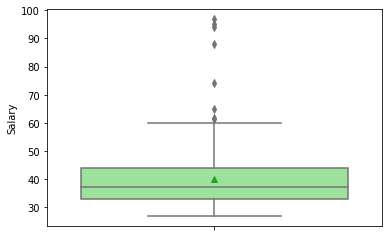

In [11]:
sns.boxplot(bank['Salary'], orient='v', color='lightgreen', showmeans=True);